1.Problem Statement:
    To identify the factors that influence a tech professional likely to develop mental health issues and need to undergo treatment.

2. Dataset: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data

3. EDA


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from scipy.stats import chi2_contingency
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import cm

sns.set(style="whitegrid")

In [213]:
df = pd.read_csv("survey.csv")

In [214]:
# Shape : (rows, columns)
print(f"Dataset shape: {df.shape}")

# Display all column names
print("\nFeature Names:")
print(df.columns.tolist())

Dataset shape: (1259, 27)

Feature Names:
['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


1. Does the data match your expectations or do you think you might need more information?

I think the dataset have enough of the information that is needed and a model could be developed with help of this data.

2. Do the columns/features align with your problem statement?

Since there are various factors are mentioned in the dataset it will be helpful to find if a person needs treatment or not with the help of the factors.

In [215]:
df.drop(columns=["Timestamp",'state',"comments"], inplace=True)

In [216]:
# Shape : (rows, columns)
print(f"Dataset shape: {df.shape}")

# Display all column names
print("\nFeature Names:")
print(df.columns.tolist())

Dataset shape: (1259, 24)

Feature Names:
['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']



1. Is the data large enough for the analysis?

The data set has 1259 records which would be suffient for our analysis.

In [217]:
df.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [218]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [219]:
print("\nmissing values:\n", df.isnull().sum())


missing values:
 Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


3. Any immediate signs of missing or corrupted data? 

We find that two of the features in the dataset contains missing values.

In [220]:
# Fill missing 'self_employed' with "Don't know"
df['self_employed'].fillna("Don't know", inplace=True)

# Fill missing 'work_interfere' with "Don't know"
df['work_interfere'].fillna("Don't know", inplace=True)

# Confirm no missing values remain
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


C:\Users\shrut\AppData\Local\Temp\ipykernel_15620\1443011202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna("Don't know", inplace=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_15620\1443011202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Missing values are identified and removed.

In [221]:
#Checking if the dataset contains duplicate rows
duplicate_rows = df.duplicated()

if duplicate_rows.any():
    print("There are duplicate rows in the dataset.")
    print("Number of duplicate rows:", duplicate_rows.sum())
else:
    print("There are no duplicate rows in the dataset.")

There are duplicate rows in the dataset.
Number of duplicate rows: 4


In [222]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [223]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    
    if gender in ['male', 'm', 'male-ish', 'maile', 'malr', 'cis male', 'cis man', 'male (cis)', 'msle', 'mail', 'make']:
        return 'Male'
    elif gender in ['female', 'f', 'cis female', 'woman', 'femail', 'cis-female/femme', 'female (cis)', 'trans female', 'trans woman']:
        return 'Female'
    else:
        return 'Other'

# Apply the function
df['Gender'] = df['Gender'].apply(clean_gender)

# Check result
df['Gender'].value_counts()


Gender
Male      988
Female    247
Other      24
Name: count, dtype: int64

Gender has different values and many are entered wrong so it is cleaned and renamed.

In [224]:
for col in df.columns:
    print(f"\n{col}: {df[col].unique()}")


Age: [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

Gender: ['Female' 'Male' 'Other']

Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' '

Unique values in each column is identified.
And treatment is the target variable here with values yes and no.

In [225]:
df['self_employed'].unique()

array(["Don't know", 'Yes', 'No'], dtype=object)

In [226]:
df['self_employed'].unique()


array(["Don't know", 'Yes', 'No'], dtype=object)

In [227]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
      dtype=object)

In [228]:
#To separate categorical columns from the dataset and printing it's number of unique values.
cat_cols = []
for col in df.columns:
  if df[col].dtype == 'object':
    print(col,":", df[col].nunique())
    cat_cols.append(col)

Gender : 3
Country : 48
self_employed : 3
family_history : 2
treatment : 2
work_interfere : 5
no_employees : 6
remote_work : 2
tech_company : 2
benefits : 3
care_options : 3
wellness_program : 3
seek_help : 3
anonymity : 3
leave : 5
mental_health_consequence : 3
phys_health_consequence : 3
coworkers : 3
supervisor : 3
mental_health_interview : 3
phys_health_interview : 3
mental_vs_physical : 3
obs_consequence : 2


Univariate Analysis

C:\Users\shrut\AppData\Local\Temp\ipykernel_15620\2552252193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=ax[i], palette="pastel")
C:\Users\shrut\AppData\Local\Temp\ipykernel_15620\2552252193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=ax[i], palette="pastel")
C:\Users\shrut\AppData\Local\Temp\ipykernel_15620\2552252193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ord

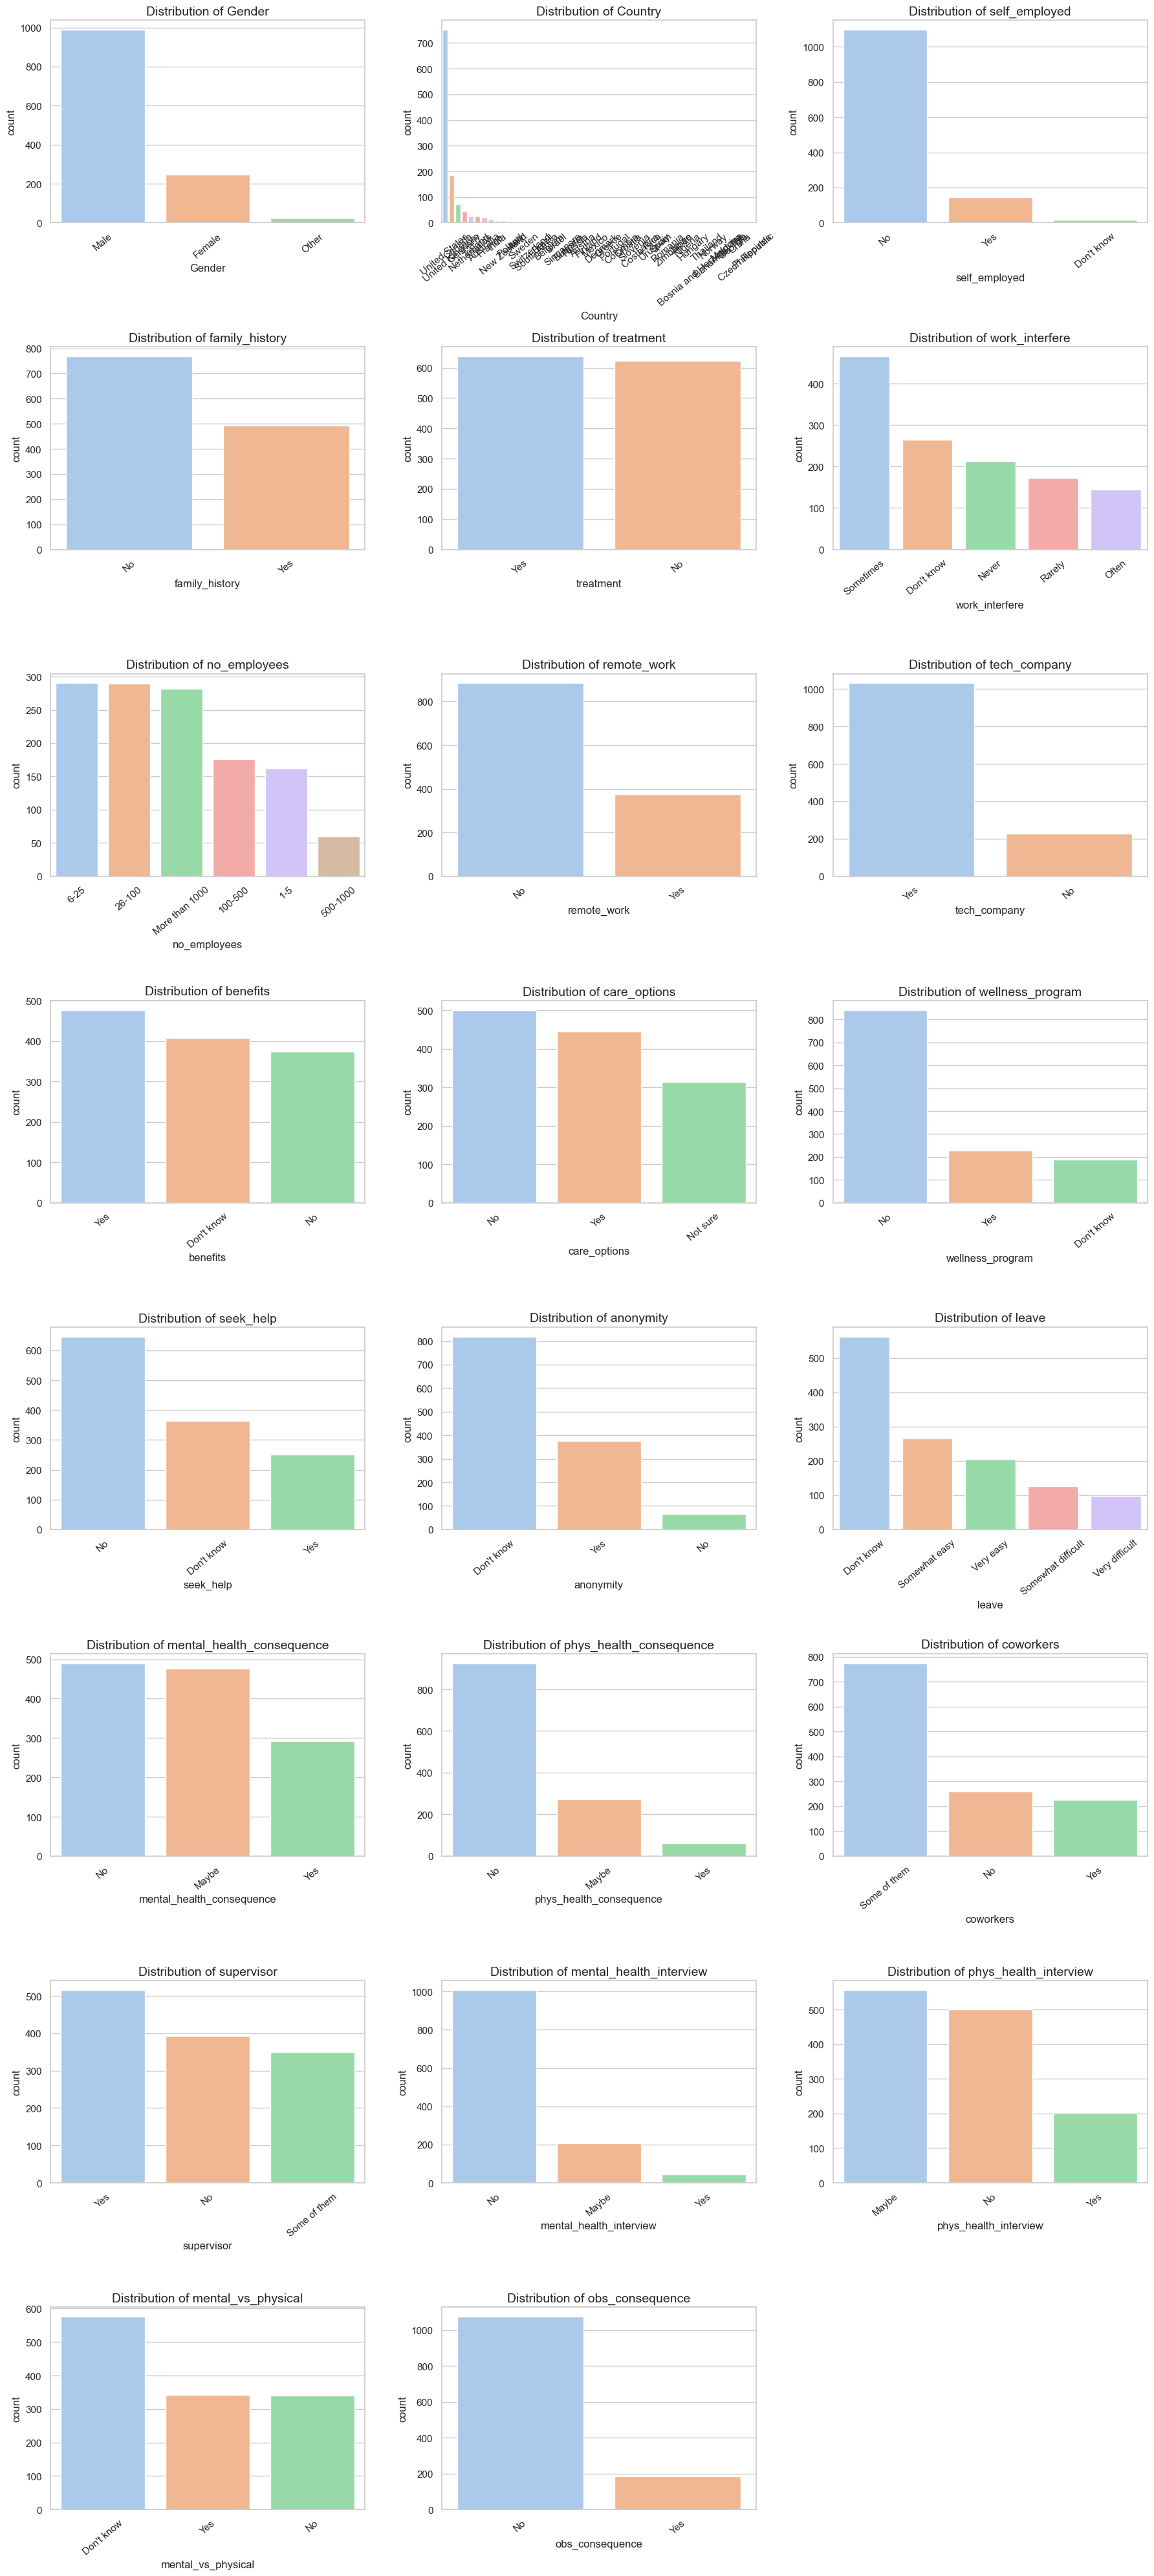

In [229]:
cols = 3
rows = (len(cat_cols) + cols - 1) // cols  # Ceiling division without math module

# Create the subplot grid
fig, ax = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
ax = ax.flatten()

# Plot each categorical feature
for i, feature in enumerate(cat_cols):
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=ax[i], palette="pastel")
    ax[i].set_title(f'Distribution of {feature}', fontsize=14)
    ax[i].tick_params(axis='x', rotation=40)

# Remove any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Univariate analysis is done for each categorical variables to figure out how the distribution is.

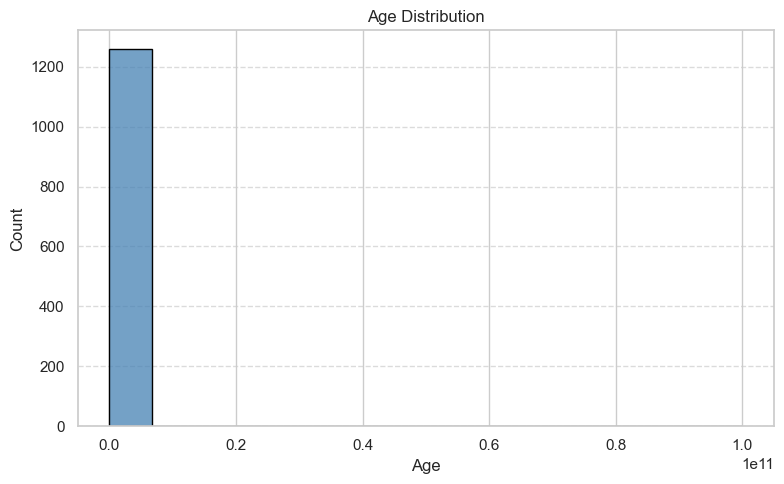

In [230]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=15, color='steelblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Did you expect outliers? 
In this dataset age is the only numeric value.
I tried the plot histogram to find the distribution of age.
only one bar appears so thermight be huge difference in the range of values.



In [231]:
print(df['Age'].unique())
print(df['Age'].describe())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


In [232]:
# Keep only valid age values
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

Tried to find the unique values of age and removed the outliers.

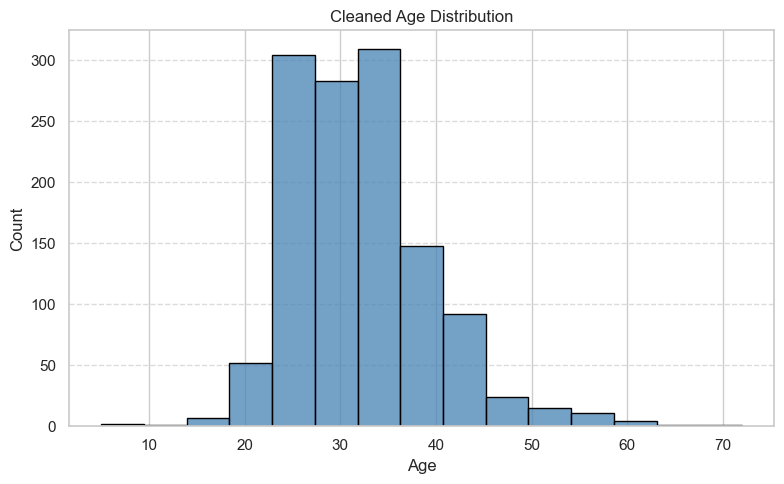

In [233]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, color='steelblue', edgecolor='black')
plt.title('Cleaned Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Histogram is plotted for the cleaned age and it seems that the survey has most of the people in the range of 25 to 45 most in the middle age.

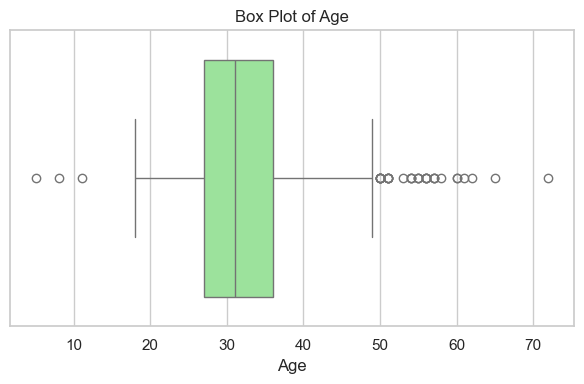

In [234]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

As previously identified box plot also tells the same where the age group of most of the people in the survey is 25-35 approximately.

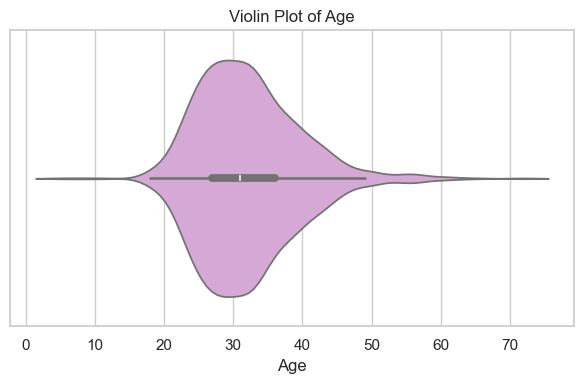

In [235]:
plt.figure(figsize=(6, 4))
sns.violinplot(x=df_cleaned['Age'], color='plum')
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


Similarly the violin plot

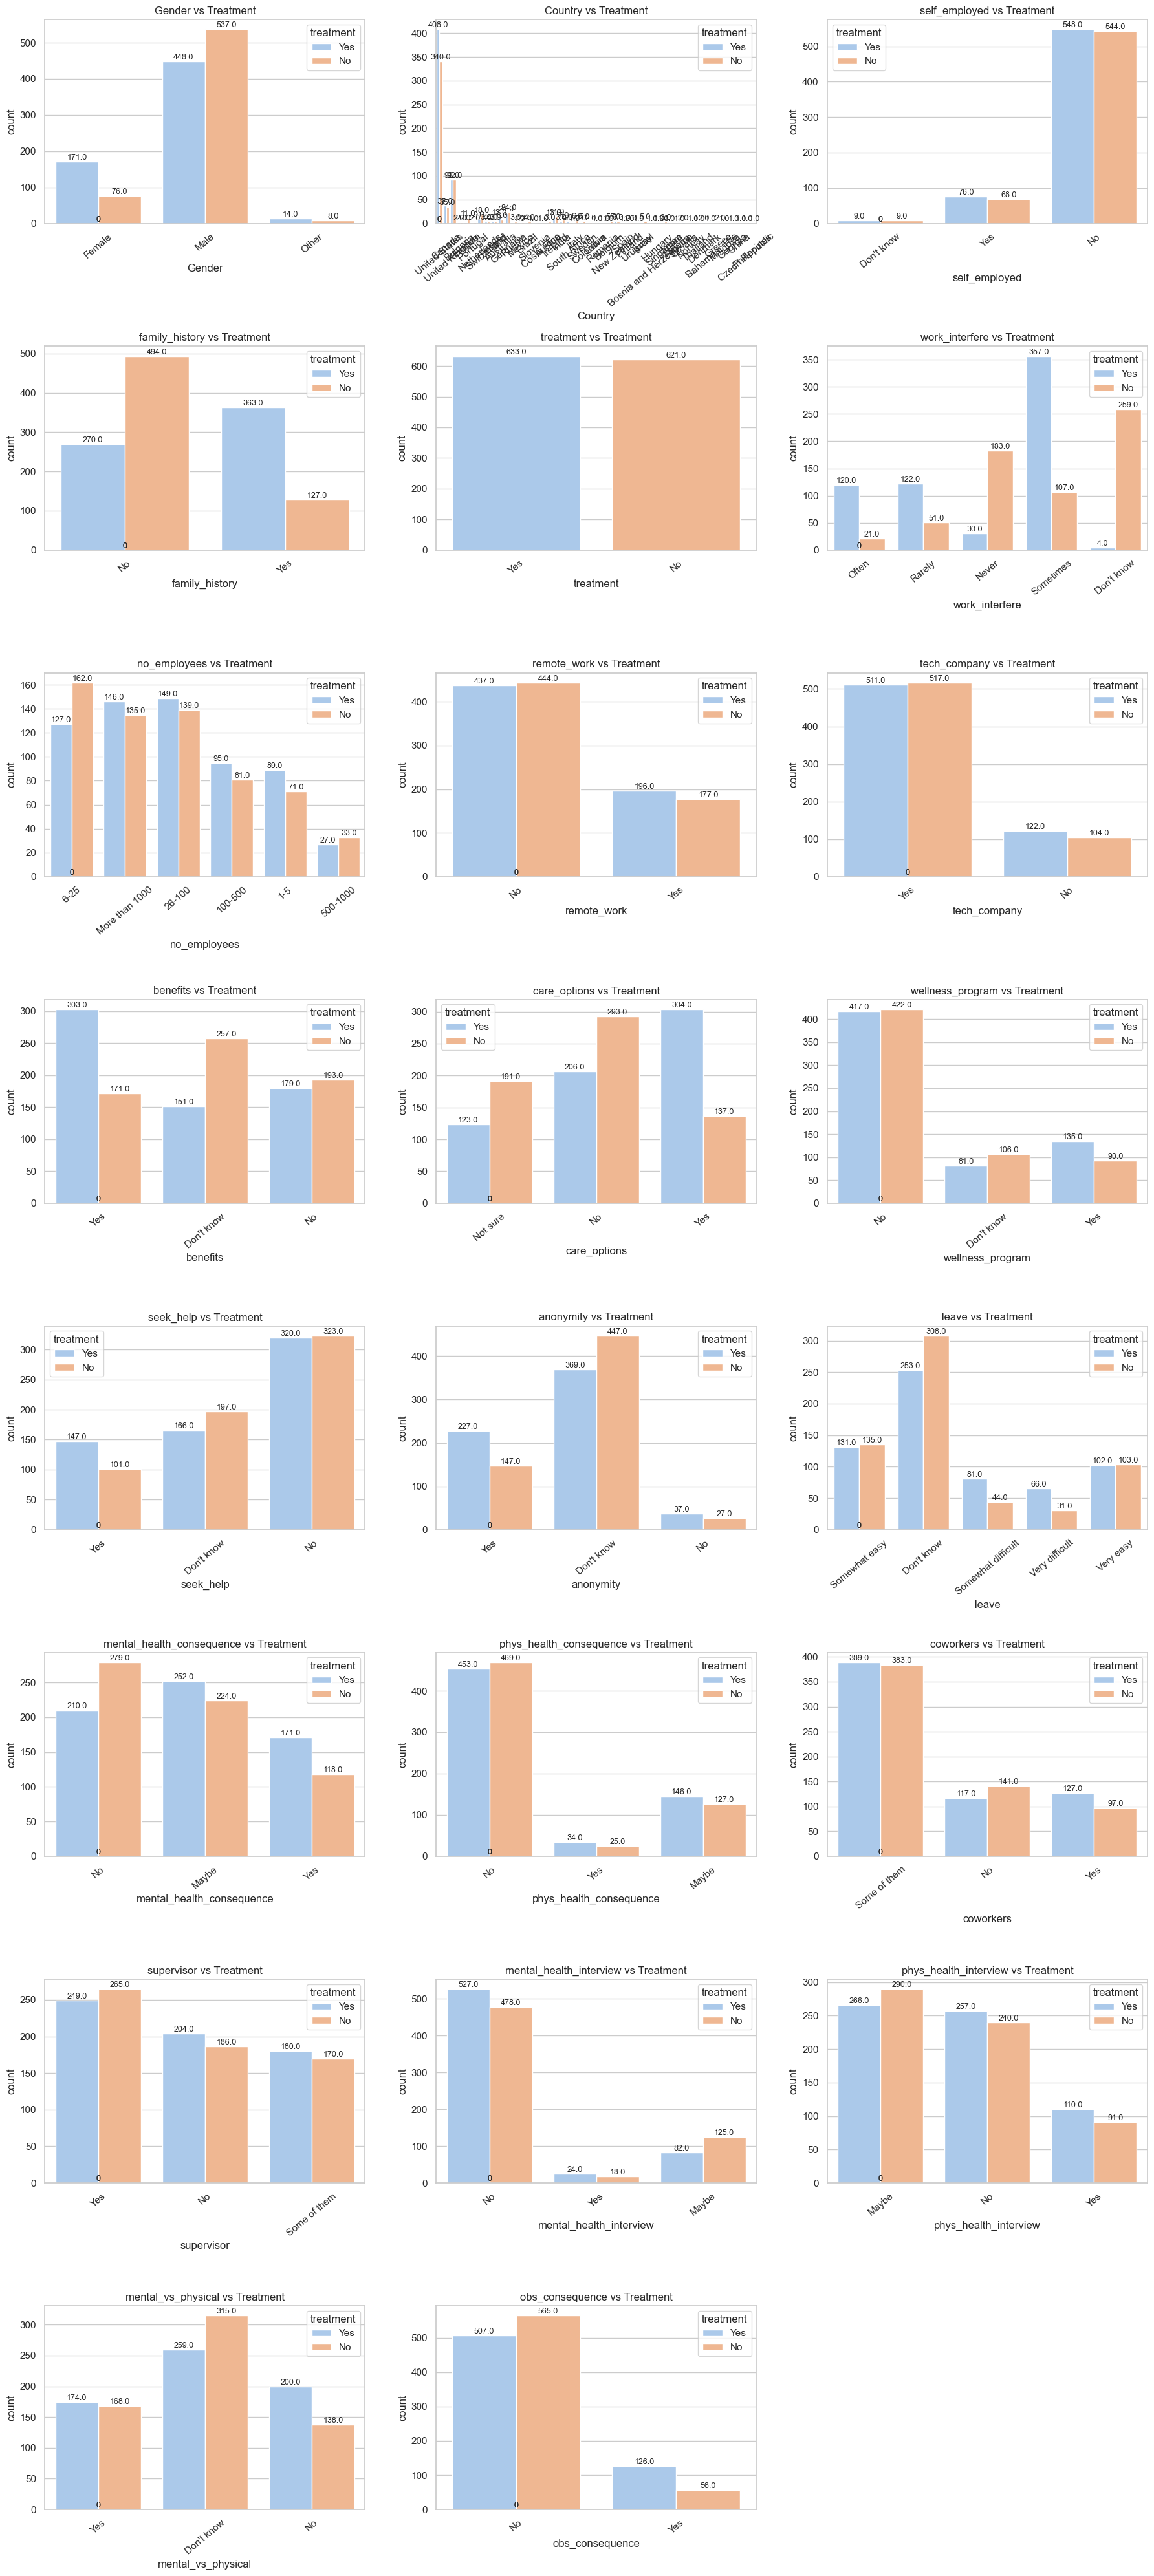

In [236]:
# Define grid size
cols = 3
rows = (len(cat_cols) + cols - 1) // cols  # Ceiling division without math module

# Create subplots
fig, ax = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='treatment', palette='pastel', ax=ax[i])
    ax[i].set_title(f'{col} vs Treatment', fontsize=12)
    ax[i].tick_params(axis='x', rotation=40)

    # Optional: Add percentage labels
    total_counts = df[col].value_counts().to_dict()
    for p in ax[i].patches:
        height = p.get_height()
        x_pos = p.get_x() + p.get_width() / 2.
        ax[i].annotate(f'{height}', (x_pos, height), ha='center', va='bottom', fontsize=9)

# Remove empty axes if any
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Bivariate analysis is done and we can easily understand from the visualisation on who undergoes treatment for each features or attributes.

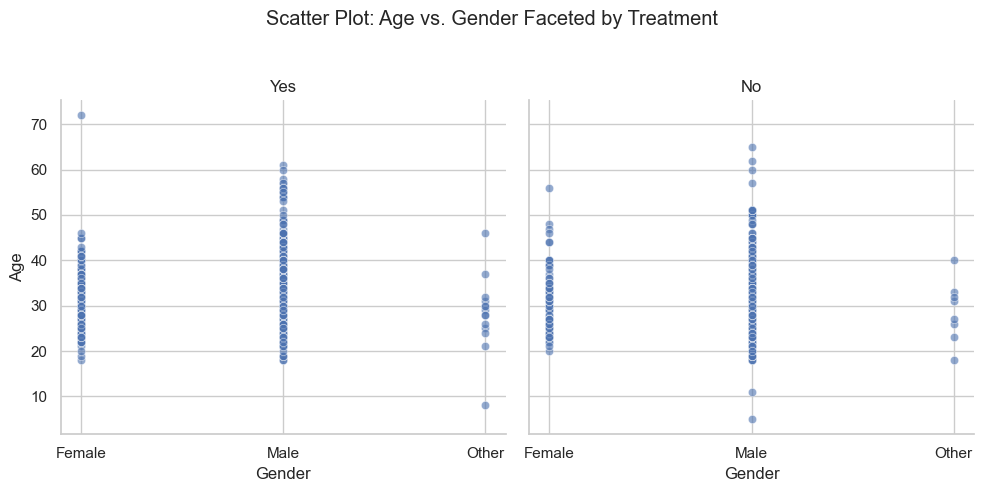

In [243]:
g = sns.FacetGrid(df, col='treatment', height=5)
g.map_dataframe(sns.scatterplot, x='Gender', y='Age', alpha=0.6)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Gender", "Age")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Scatter Plot: Age vs. Gender Faceted by Treatment")
plt.show()

From the above faceted scatter plots, we can observe that the age distribution among males who receive treatment includes a higher number of individuals in the 45–60 age range compared to those who do not receive treatment. Similarly, among females, individuals aged 40–45 appear more frequently in the treatment group than in the non-treatment group

C:\Users\shrut\AppData\Local\Temp\ipykernel_15620\1000295035.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cramers_df.index, rotation=90)


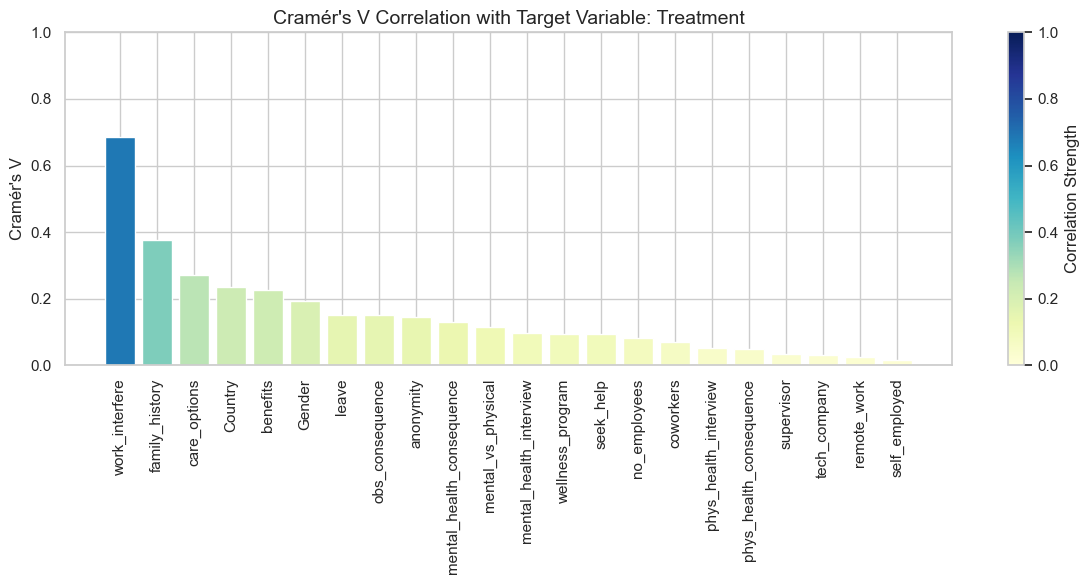

In [237]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import cm

# Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Categorical columns
cat_cols = [
    'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere',
    'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'anonymity', 'leave',
    'mental_health_consequence', 'phys_health_consequence', 'coworkers',
    'supervisor', 'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence'
]
target_col = 'treatment'

# Compute Cramér's V
cramers_scores = {}
for col in cat_cols:
    try:
        cramers_scores[col] = round(cramers_v(df[col], df[target_col]), 3)
    except:
        cramers_scores[col] = np.nan

# Prepare DataFrame
cramers_df = pd.DataFrame.from_dict(cramers_scores, orient='index', columns=["Cramér's V"])
cramers_df.dropna(inplace=True)
cramers_df.sort_values(by="Cramér's V", ascending=False, inplace=True)

# Normalize color values
norm = Normalize(vmin=0, vmax=1)
cmap = cm.YlGnBu
colors = [cmap(norm(val)) for val in cramers_df["Cramér's V"]]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(cramers_df.index, cramers_df["Cramér's V"], color=colors)
ax.set_title("Cramér's V Correlation with Target Variable: Treatment", fontsize=14)
ax.set_ylabel("Cramér's V")
ax.set_xticklabels(cramers_df.index, rotation=90)
ax.set_ylim(0, 1)

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required dummy array
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Correlation Strength")

plt.tight_layout()
plt.show()


The correlation between the target variable treatment and the catgorical variables is found. It is found that the work_interfere make a huge difference in the treatment and attributes like remote work,self employed make less impact.

the less correlated variable can be removed.
Let us have only the first 10 highly correlated variables.